<a href="https://colab.research.google.com/github/Saya-Sayita/Challenge1-Python/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np

from IPython.display import display, HTML, Markdown

# Leemos los archivos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregamos una columna indicando la tienda de origen
tienda1['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

# Unimos todos los datos en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
#tienda1.head()
df

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


#1. Análisis de facturación



In [27]:
# 1. FACTURACIÓN TOTAL POR TIENDA

# Función para calcular facturación total
def calcular_facturacion(data):
    return (data["Precio"]).sum()

# Calculamos la facturación para cada tienda
facturaciones = {
    "Tienda 1": calcular_facturacion(tienda1),
    "Tienda 2": calcular_facturacion(tienda2),
    "Tienda 3": calcular_facturacion(tienda3),
    "Tienda 4": calcular_facturacion(tienda4),
}

for tienda, valor in facturaciones.items():
    print(f"{tienda} - Facturación Total: ${valor:,.2f}")

# Facturación total de todas las tiendas
facturacion_total = sum(facturaciones.values())
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:,.2f}\n")

Tienda 1 - Facturación Total: $1,150,880,400.00
Tienda 2 - Facturación Total: $1,116,343,500.00
Tienda 3 - Facturación Total: $1,098,019,600.00
Tienda 4 - Facturación Total: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00



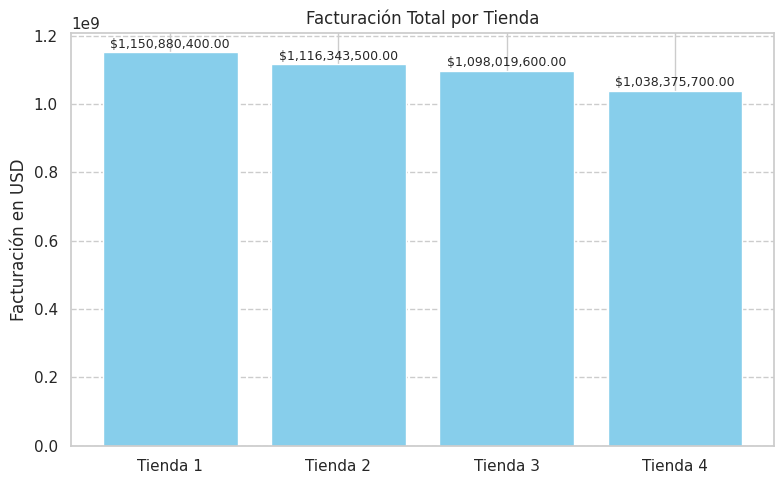

In [28]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(list(facturaciones.keys()), list(facturaciones.values()), color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación en USD')
plt.grid(axis='y', linestyle='--')
# Añadir etiquetas numéricas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + facturacion_total * 0.001,  # Espacio por encima
        f"${height:,.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

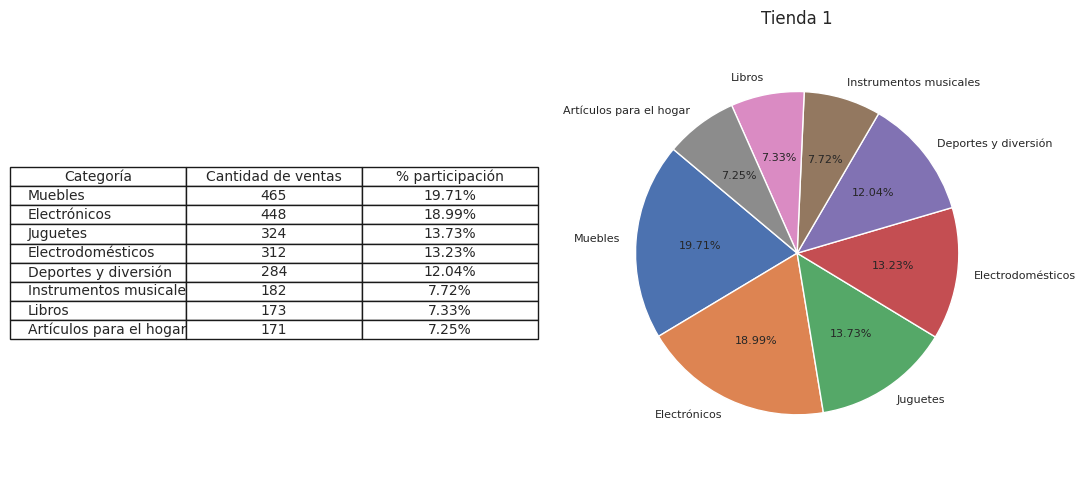

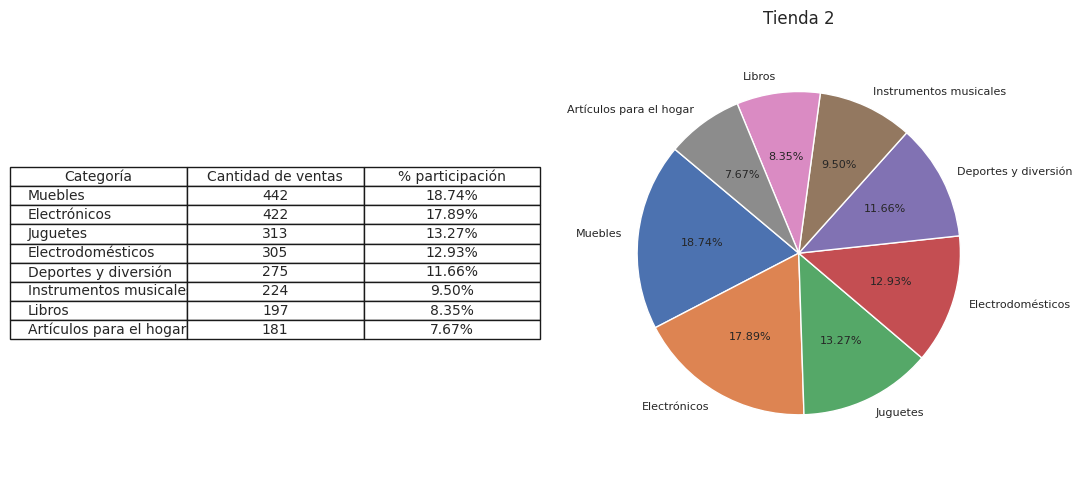

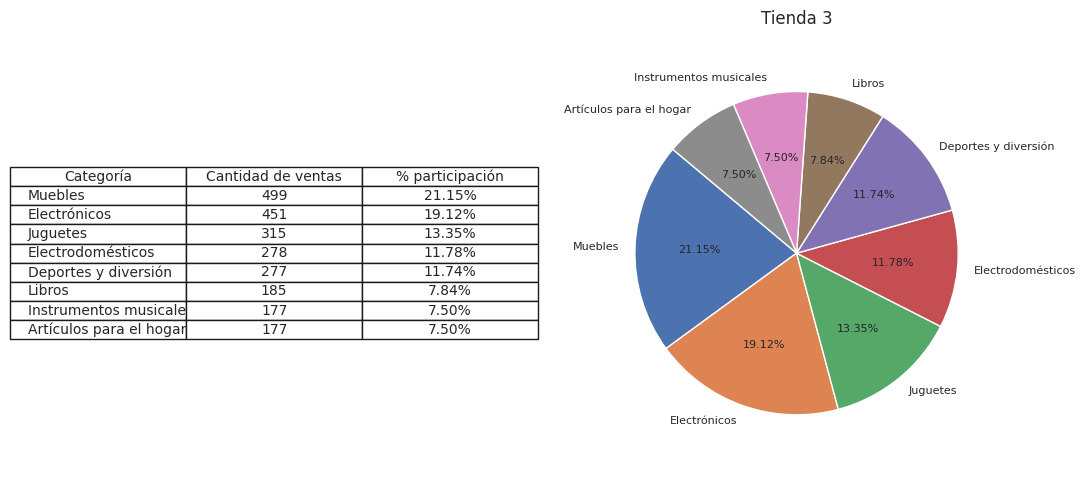

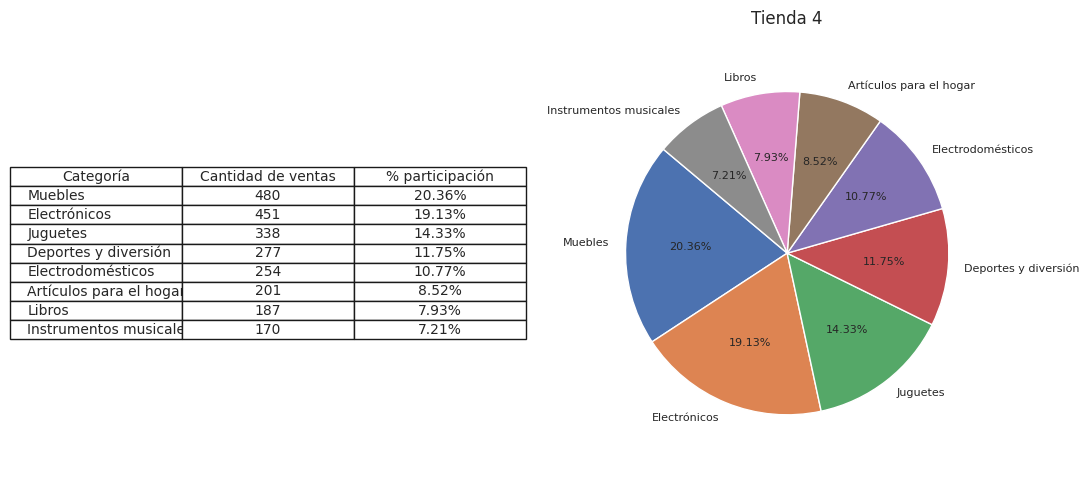

In [29]:
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Función cantidad de ventas por categoría
def mostrar_ventas_por_categoria(df, nombre_tienda):
    display(HTML(f"<h3 style='font-weight:bold;'>VENTAS POR CATEGORÍA DE {nombre_tienda.upper()}</h3>"))

    data_tienda = df[df['tienda'] == nombre_tienda]

    # Contar cantidad de productos vendidos por categoría
    resumen = data_tienda['Categoría del Producto'].value_counts().reset_index()
    resumen.columns = ['Categoría', 'Cantidad de ventas']

    # Ordenar de mayor a menor
    resumen = resumen.sort_values(by='Cantidad de ventas', ascending=False)

    # Calcular porcentaje de participación
    total = resumen['Cantidad de ventas'].sum()
    resumen['% participación'] = (resumen['Cantidad de ventas'] / total * 100).apply(lambda x: f"{x:.2f}%")

    # Tabla y gráfico
    fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [1.5, 1]})
    axs[0].axis('off')
    tabla = axs[0].table(cellText=resumen.values,
                         colLabels=resumen.columns,
                         cellLoc='center',
                         loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    for i in range(len(resumen)):
        tabla[i + 1, 0].get_text().set_ha('left')

    # Gráfico de pastel
    axs[1].pie(resumen['Cantidad de ventas'],
               labels=resumen['Categoría'],
               autopct='%1.2f%%',
               startangle=140,
               textprops={'fontsize': 8})
    axs[1].set_title(f'{nombre_tienda}', fontsize=12)
    axs[1].axis('equal')
    plt.tight_layout()
    plt.show()

# Despliegue para cada tienda
for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    mostrar_ventas_por_categoria(df, tienda)

# 3. Calificación promedio de la tienda


### Promedio de calificación de cada tienda:



Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00




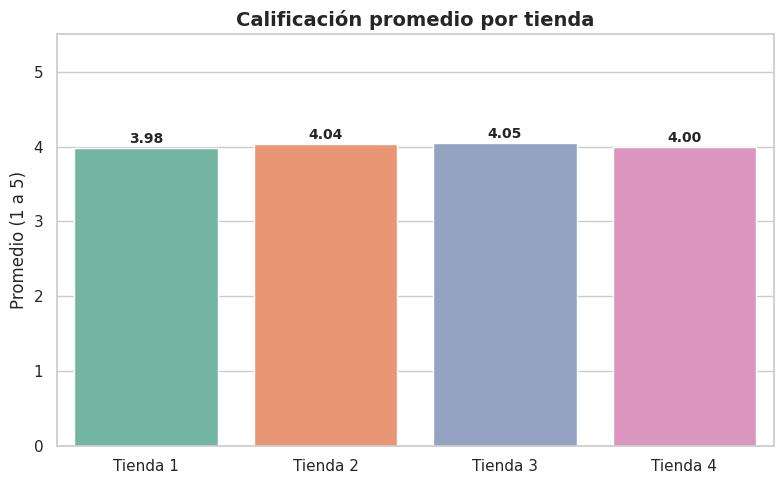

In [30]:
# Desactivar mensajes innecesarios (como FutureWarning de Seaborn)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def calificacion_promedio(data):
    return data["Calificación"].mean()

def mostrar_calificacion_promedio(data, nombre_tienda):
    promedio = calificacion_promedio(data)
    print(f"{nombre_tienda} - Calificación promedio: {promedio:.2f}")
    return promedio

# Calcular promedios y almacenar resultados
display(Markdown("### Promedio de calificación de cada tienda:"))
resultados = []
print('\n')

for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    data_tienda = df[df['tienda'] == tienda]
    promedio = mostrar_calificacion_promedio(data_tienda, tienda)
    resultados.append({"Tienda": tienda, "Calificación promedio": promedio})

# Crear DataFrame de resultados
df_promedios = pd.DataFrame(resultados)
df_promedios = df_promedios.sort_values("Tienda", ascending=True)


# Configuración del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras (evita advertencias)
bars = sns.barplot(
    data=df_promedios,
    x="Tienda",
    y="Calificación promedio",
    palette="Set2"
)

# Añadir etiquetas numéricas sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Estética final
plt.ylim(0, 5.5)
print('\n')
plt.title("Calificación promedio por tienda", fontsize=14, fontweight='bold')
plt.ylabel("Promedio (1 a 5)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

### **PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA**

#### **TIENDA 1**

Clasificación       Producto                                     Cantidad de ventas
-----------------------------------------------------------------------------------
Más vendido         Microondas                                   60 ventas
Menos vendido       Auriculares con micrófono                    33 ventas


#### **TIENDA 2**

Clasificación       Producto                                     Cantidad de ventas
-----------------------------------------------------------------------------------
Más vendido         Iniciando en programación                    65 ventas
Menos vendido       Juego de mesa                                32 ventas


#### **TIENDA 3**

Clasificación       Producto                                     Cantidad de ventas
-----------------------------------------------------------------------------------
Más vendido         Kit de bancas                                57 ventas
Menos vendido       Bloques de construcción                      35 ventas


#### **TIENDA 4**

Clasificación       Producto                                     Cantidad de ventas
-----------------------------------------------------------------------------------
Más vendido         Cama box                                     62 ventas
Menos vendido       Guitarra eléctrica                           33 ventas




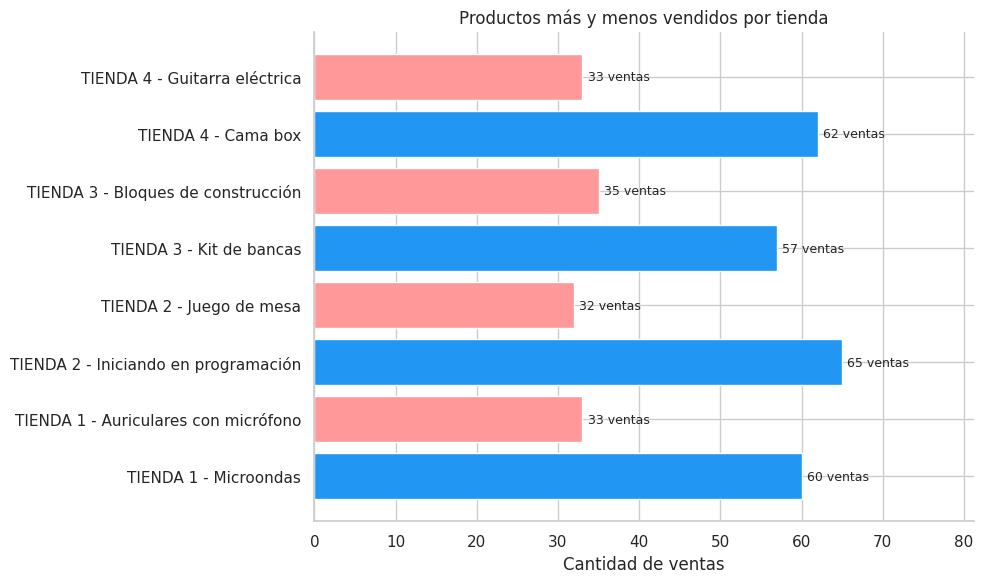

In [31]:
display(Markdown("### **PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA**"))

# Datos por tienda
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Para gráfico
etiquetas = []
productos = []
ventas = []
colores = []

# Texto por tienda
for i, tienda in enumerate(tiendas):
    resumen = tienda["Producto"].value_counts()
    producto_mas_vendido = resumen.idxmax()
    ventas_mas_vendido = resumen.max()
    producto_menos_vendido = resumen.idxmin()
    ventas_menos_vendido = resumen.min()

    # Título de tienda
    display(Markdown(f"#### **{nombres_tiendas[i]}**"))

    # Texto alineado
    print("Clasificación".ljust(20) + "Producto".ljust(45) + "Cantidad de ventas")
    print("-" * 83)
    print("Más vendido".ljust(20) + producto_mas_vendido.ljust(45) + f"{ventas_mas_vendido:,}".replace(",", ".") + " ventas")
    print("Menos vendido".ljust(20) + producto_menos_vendido.ljust(45) + f"{ventas_menos_vendido:,}".replace(",", ".") + " ventas")

    # Para el gráfico
    etiquetas.append(f"{nombres_tiendas[i]} - {producto_mas_vendido}")
    productos.append(producto_mas_vendido)
    ventas.append(ventas_mas_vendido)
    colores.append('#2196F3')

    etiquetas.append(f"{nombres_tiendas[i]} - {producto_menos_vendido}")
    productos.append(producto_menos_vendido)
    ventas.append(ventas_menos_vendido)
    colores.append('#FF9999')

print('\n')

# Gráfico único agrupado
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(etiquetas, ventas, color=colores)

for bar in bars:
    ancho = bar.get_width()
    ax.text(ancho + max(ventas) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{int(ancho):,}".replace(",", ".") + " ventas",
            va='center', fontsize=9)

ax.set_xlabel("Cantidad de ventas")
ax.set_xlim(0, max(ventas) * 1.25)
ax.set_title("Productos más y menos vendidos por tienda")
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

## **COSTO PROMEDIO DE ENVÍO POR TIENDA**

Tienda 1 - Costo de envío promedio: $26,018.61
Tienda 2 - Costo de envío promedio: $25,216.24
Tienda 3 - Costo de envío promedio: $24,805.68
Tienda 4 - Costo de envío promedio: $23,459.46




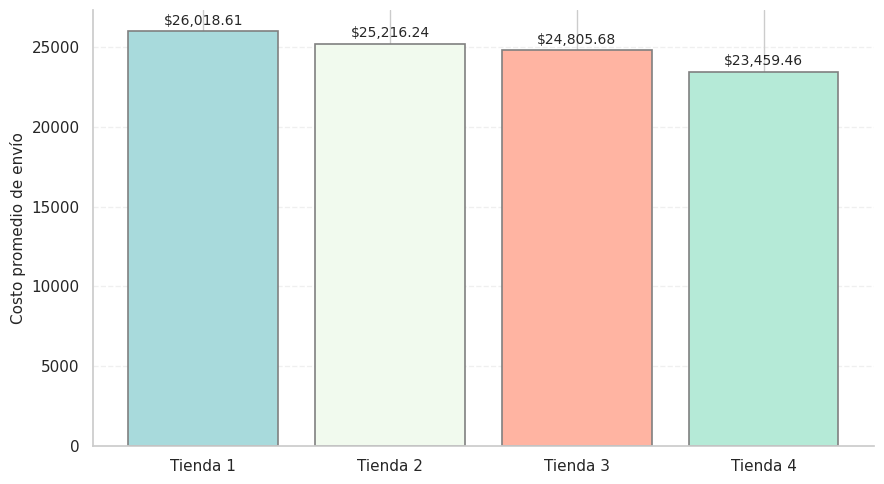

In [32]:
# Título principal
display(Markdown("## **COSTO PROMEDIO DE ENVÍO POR TIENDA**"))

def costo_envio_promedio(data):
    return data["Costo de envío"].mean()

def mostrar_costo_envio_promedio(data, nombre_tienda):
    promedio = costo_envio_promedio(data)
    print(f"{nombre_tienda} - Costo de envío promedio: ${promedio:,.2f}")
    return promedio

# Listas para el gráfico
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_promedio = []

# Cálculo y despliegue
for t in nombres_tiendas:
    promedio = mostrar_costo_envio_promedio(df[df['tienda'] == t], t)
    costos_promedio.append(promedio)

# Gráfico de columnas
colores = ['#A8DADC', '#F1FAEE', '#FFB4A2', '#B5EAD7']

fig, ax = plt.subplots(figsize=(9, 5))
barras = ax.bar(nombres_tiendas, costos_promedio, color=colores, edgecolor='gray', linewidth=1.2)

# Etiquetas para cada barra
for bar in barras:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + max(costos_promedio)*0.015,
            f"${height:,.2f}",
            ha='center', fontsize=10)


print('\n')
ax.set_ylabel("Costo promedio de envío", fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Análisis integral para la decisión de ventas de tiendas

---
 <br>

### 1. Facturación Total

- **Tienda 1**: \$1.150.880.400<br>
- **Tienda 2**: \$1.116.343.500<br>
- **Tienda 3**: \$1.098.019.600<br>
- **Tienda 4**: \$1.038.375.700<br>
<br>  

La **Tienda 1** lidera en facturación total, seguida de cerca por la tienda 2 y la tienda 3. La tienda 4 presenta la menor facturación, con una diferencia considerable respecto a la tienda 1.


 <br>

### 2. Ventas por Categoría

- En todas las tiendas, las categorías más vendidas son **Muebles** y **Electrónicos**, con cifras muy similares.  
- Las ventas por categoría son bastante consistentes entre tiendas, sin diferencias drásticas que marquen una ventaja competitiva clara.  
- **Tienda 1** y **Tienda 3** presentan ligeras ventajas en volúmenes globales, pero no lo suficiente como para cambiar el panorama general.


 <br>

### 3. Calificación Promedio

- **Tienda 1**: 3.98  
- **Tienda 2**: 4.04  
- **Tienda 3**: 4.05  
- **Tienda 4**: 4.00  

La **Tienda 3** posee la mejor calificación promedio (4.05), seguida por la tienda 2. La tienda 1 tiene la calificación más baja, aunque no está lejos del promedio.

 <br>

### 4. Productos Más y Menos Vendidos

- En todas las tiendas, los productos más vendidos tienen entre **57 y 65 unidades**, mientras que los menos vendidos rondan entre **32 y 35 unidades**.  
- No se observan productos extremos ni tendencias que destaquen categóricamente a una tienda.  
- La distribución de ventas de productos sugiere una demanda equilibrada por tipo de artículo, sin sesgos importantes.

 <br>

### 5. Costo Promedio de Envío

- **Tienda 1**: \$26.018,61  
- **Tienda 2**: \$25.216,24  
- **Tienda 3**: \$24.805,68  
- **Tienda 4**: \$23.459,46  
<br>  

La **Tienda 4** tiene el costo de envío más bajo, lo que podría representar una ventaja si estuviera acompañada de buenos indicadores en las otras áreas.

 <br>

## Recomendación Final

Al considerar de manera integral los cinco criterios:

1. La **Tienda 1** tiene la mejor facturación pero la peor calificación y el envío más caro.  
2. La **Tienda 2** tiene cifras equilibradas, sin sobresalir ni quedar rezagada.  
3. La **Tienda 3** ofrece el mejor balance general, con una muy buena calificación, buena facturación y costo de envío aceptable.  
4. La **Tienda 4**, a pesar de tener el mejor costo de envío, presenta **la menor facturación**, sin ventajas importantes en calificación o ventas por categoría.  
  
  
**Por lo tanto, se recomienda que el señor Juan cierre la Tienda 4**, ya que es la que presenta **menor rendimiento global** considerando los criterios estratégicos definidos.
